In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


**EDA AND FEATURE ENGINEERING**

In [2]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

In [3]:
training.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
training.shape

(8693, 14)

In [5]:
training.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
print("Number of Null Values:")
print(training.isnull().sum())

Number of Null Values:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [7]:
# Removing column Cabin
training[['cab_deck', 'cab_num', 'cab_side']] = training['Cabin'].str.split("/", expand = True)
training.drop('Cabin',axis=1,inplace=True)

In [8]:
# Removing column PassengerId and Name
training[['Group', 'People']] = training['PassengerId'].str.split('_', expand = True)
training.drop('PassengerId', axis = 1, inplace=True)

In [9]:
training.drop('Name', axis = 1, inplace=True)

In [10]:
training['People'] = training['People'].astype('int')
training['Group'] = training['Group'].astype('int')

In [11]:
training['People'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [12]:
training.drop('Group', axis = 1, inplace=True)

In [13]:
training.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cab_deck,cab_num,cab_side,People
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1


In [14]:
training['CryoSleep'] = training['CryoSleep'].astype('bool')
training['VIP'] = training['VIP'].astype('bool')
training['cab_num'] = training['cab_num'].astype('float')

In [15]:
for feature in training.columns:
    print(f'{feature} ------> {training[feature].dtype}')

HomePlanet ------> object
CryoSleep ------> bool
Destination ------> object
Age ------> float64
VIP ------> bool
RoomService ------> float64
FoodCourt ------> float64
ShoppingMall ------> float64
Spa ------> float64
VRDeck ------> float64
Transported ------> bool
cab_deck ------> object
cab_num ------> float64
cab_side ------> object
People ------> int64


In [16]:
numerical_features = [feature for feature in training.columns if training[feature].dtype != 'object']
numerical_features

['CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'cab_num',
 'People']

In [17]:
continuous_features = []
discrete_features = []

for feature in numerical_features:
    if len(training[feature].unique()) <= 10:
        discrete_features.append(feature)
    else:
        continuous_features.append(feature)

continuous_features, discrete_features

(['Age',
  'RoomService',
  'FoodCourt',
  'ShoppingMall',
  'Spa',
  'VRDeck',
  'cab_num'],
 ['CryoSleep', 'VIP', 'Transported', 'People'])

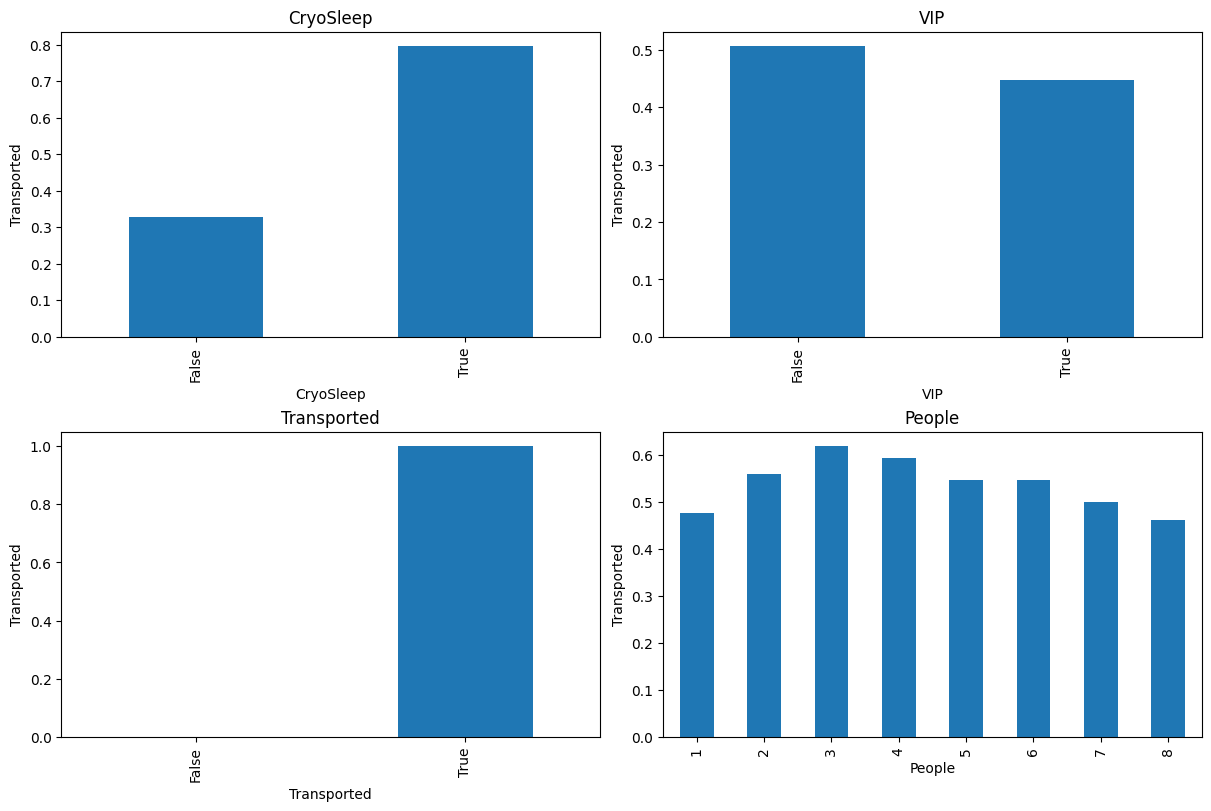

In [18]:
n_features = len(discrete_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8), constrained_layout=True)
axes = axes.flatten()

for i, feature in enumerate(discrete_features):
    training.groupby(feature)['Transported'].mean().plot.bar(ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Transported')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.show()

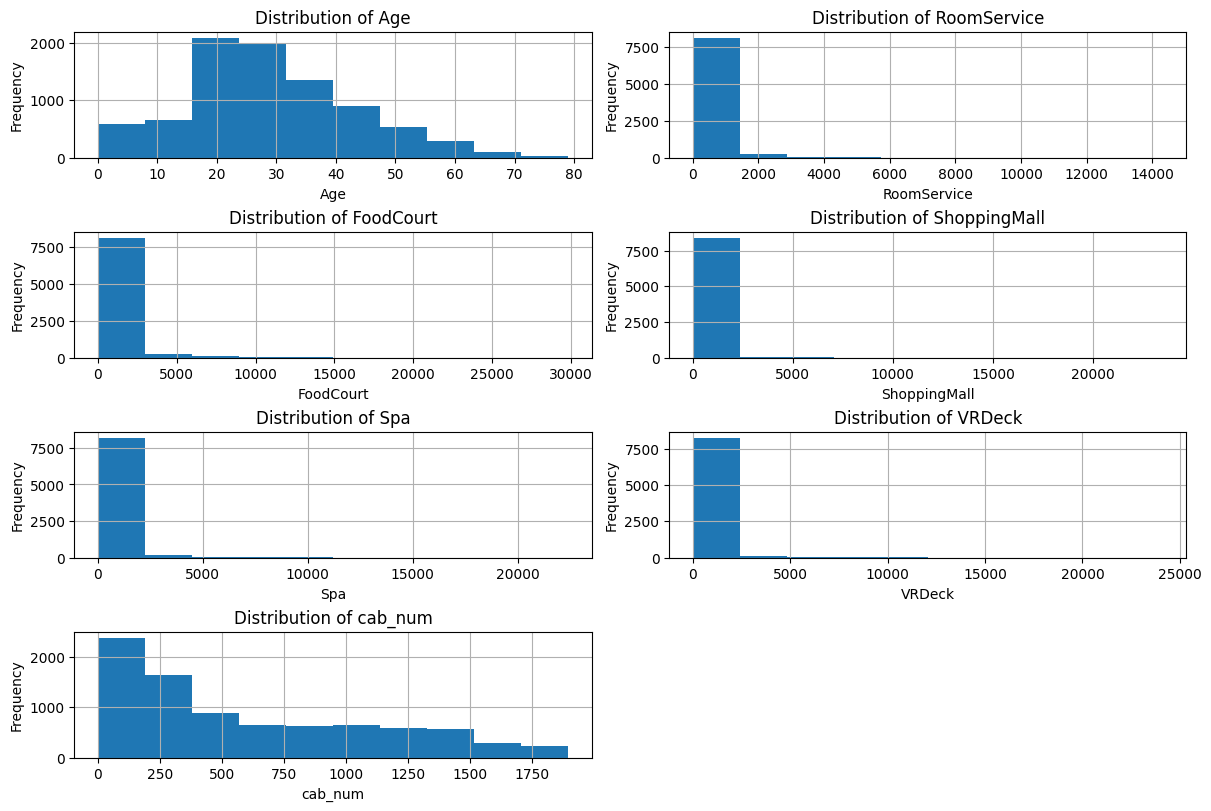

In [19]:
n_features1 = len(continuous_features)
n_cols = 2
n_rows1 = (n_features1 + 1) // n_cols

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows1, n_cols, figsize=(12, 8), constrained_layout=True)
axes = axes.flatten()

# Plot each continuous feature
for i, feature in enumerate(continuous_features):
    training[feature].hist(ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, n_rows1 * n_cols):
    fig.delaxes(axes[j])

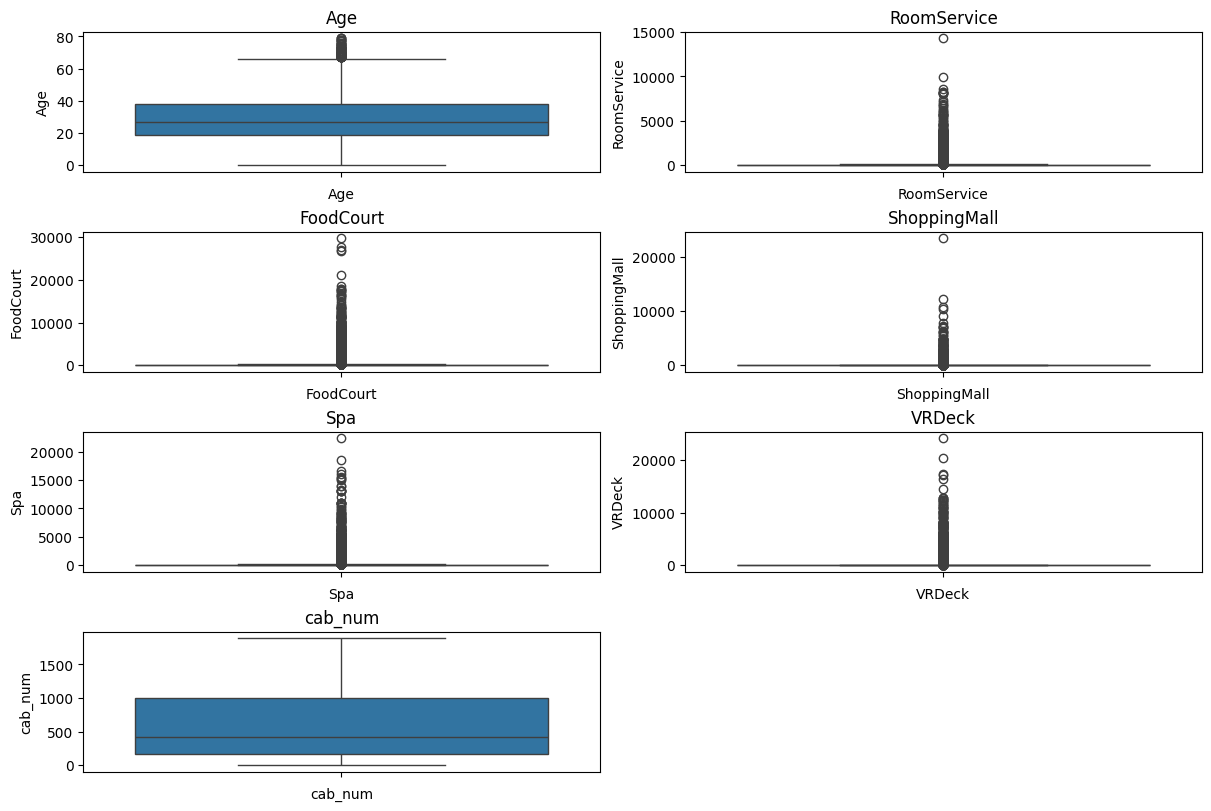

In [20]:
fig, axes = plt.subplots(n_rows1, n_cols, figsize=(12, 8), constrained_layout=True)
axes = axes.flatten()

# Plot each continuous feature
for i, feature in enumerate(continuous_features):
    sns.boxplot(training[feature], ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
# Remove any empty subplots
for j in range(i + 1, n_rows1 * n_cols):
    fig.delaxes(axes[j])

In [21]:
categorical_features = [feature for feature in training.columns if training[feature].dtype == 'object']
categorical_features

['HomePlanet', 'Destination', 'cab_deck', 'cab_side']

In [22]:
training.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cab_deck,cab_num,cab_side,People
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S,1


In [23]:
for feature in categorical_features:
    print(f"{feature} ---->{training[feature].unique()}")

HomePlanet ---->['Europa' 'Earth' 'Mars' nan]
Destination ---->['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
cab_deck ---->['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
cab_side ---->['P' 'S' nan]


**FEATURE ENGINEERING**

In [24]:
training.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cab_deck,cab_num,cab_side,People
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S,1


In [25]:
num_df = pd.DataFrame(training[numerical_features])
num_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cab_num,People
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0.0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,2
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0,1


In [26]:
num_df.isnull().sum()

CryoSleep         0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
cab_num         199
People            0
dtype: int64

In [27]:
num_df.drop(['CryoSleep', 'VIP', 'Transported'], axis = 1, inplace=True)
num_df.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'cab_num', 'People'],
      dtype='object')

In [28]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
num_df1 = imp.fit_transform(num_df)
num_df = pd.DataFrame(num_df1, columns = num_df.columns)

In [29]:
num_df.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
cab_num         0
People          0
dtype: int64

In [30]:
categorical_features

['HomePlanet', 'Destination', 'cab_deck', 'cab_side']

In [31]:
num_df2 = pd.DataFrame(training[['CryoSleep', 'VIP', 'Transported']])
num_df2.isnull().sum()

CryoSleep      0
VIP            0
Transported    0
dtype: int64

In [32]:
cat_df = pd.DataFrame(training[categorical_features])
cat_df.head()

,HomePlanet,Destination,cab_deck,cab_side
0,Europa,TRAPPIST-1e,B,P
1,Earth,TRAPPIST-1e,F,S
2,Europa,TRAPPIST-1e,A,S
3,Europa,TRAPPIST-1e,A,S
4,Earth,TRAPPIST-1e,F,S


In [33]:
cat_df.isnull().sum()

HomePlanet     201
Destination    182
cab_deck       199
cab_side       199
dtype: int64

In [34]:
for feature in categorical_features:
    temp = cat_df[feature].mode()[0]
    cat_df[feature].fillna(temp, inplace=True)

/var/folders/f3/kgkwlzhd025fqwv56bs8t87m0000gn/T/ipykernel_47134/2360757268.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_df[feature].fillna(temp, inplace=True)


In [35]:
cat_df.isnull().sum()

HomePlanet     0
Destination    0
cab_deck       0
cab_side       0
dtype: int64

In [36]:
new_training = pd.concat([num_df, num_df2, cat_df], axis = 1)

In [37]:
new_training.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
cab_num         0
People          0
CryoSleep       0
VIP             0
Transported     0
HomePlanet      0
Destination     0
cab_deck        0
cab_side        0
dtype: int64

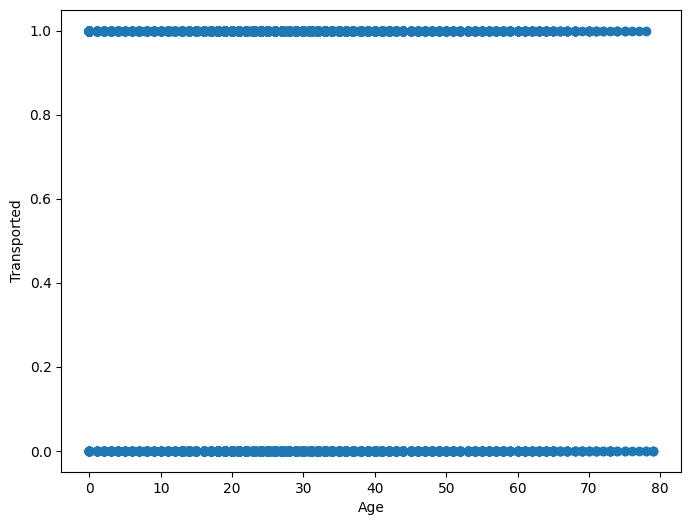

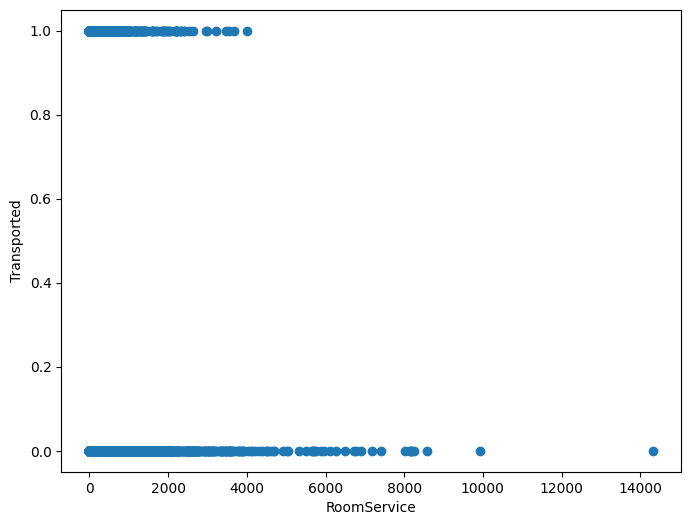

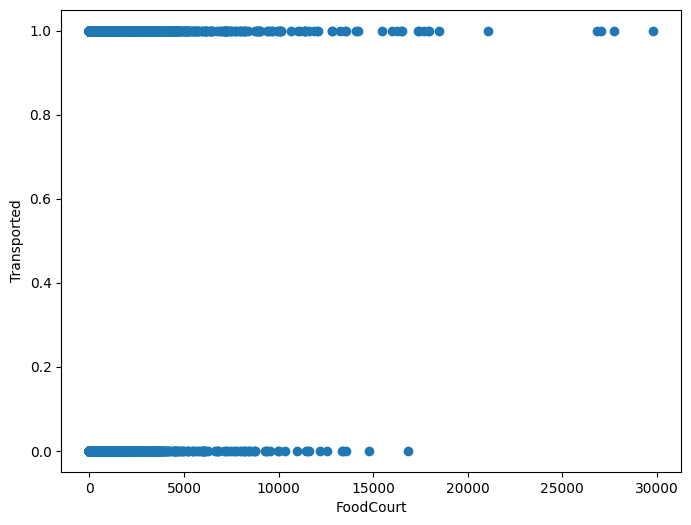

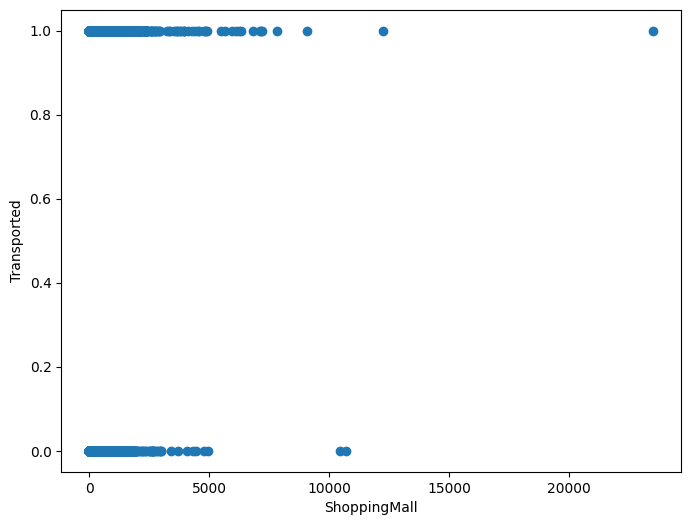

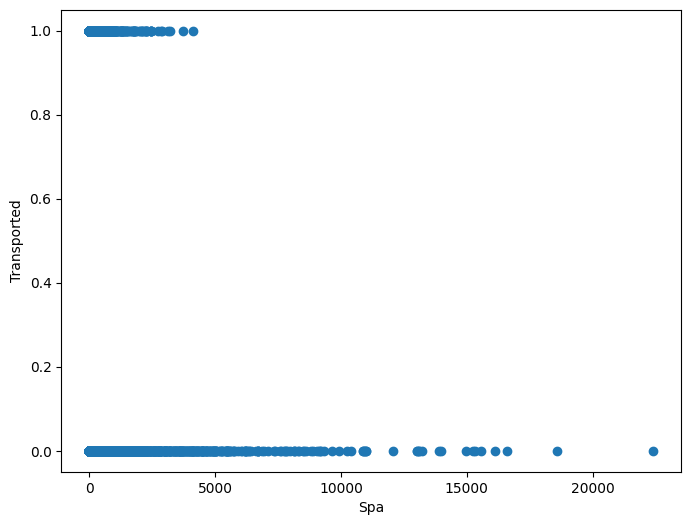

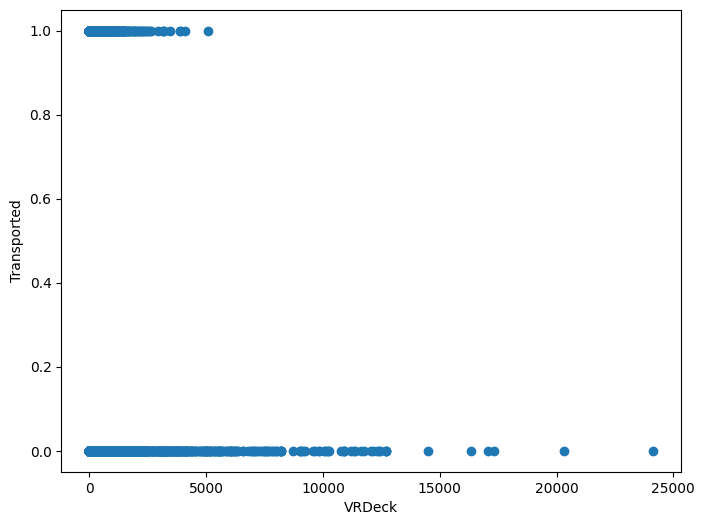

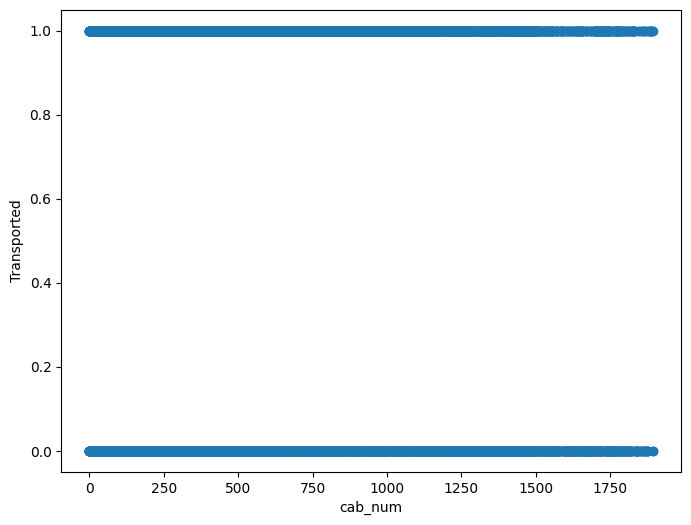

In [38]:
for feature in continuous_features:
    plt.figure(figsize = (8, 6))
    plt.scatter(new_training[feature], new_training['Transported'])
    plt.xlabel(feature)
    plt.ylabel('Transported')
    plt.show()

In [39]:
new_training[categorical_features]

,HomePlanet,Destination,cab_deck,cab_side
0,Europa,TRAPPIST-1e,B,P
1,Earth,TRAPPIST-1e,F,S
2,Europa,TRAPPIST-1e,A,S
3,Europa,TRAPPIST-1e,A,S
4,Earth,TRAPPIST-1e,F,S
...,...,...,...,...
8688,Europa,55 Cancri e,A,P
8689,Earth,PSO J318.5-22,G,S
8690,Earth,TRAPPIST-1e,G,S
8691,Europa,55 Cancri e,E,S


In [40]:
new_training1 = new_training.copy()

In [41]:
new_training1 = pd.get_dummies(new_training1, columns = categorical_features, drop_first= True)

In [42]:
new_training1.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'cab_num', 'People', 'CryoSleep', 'VIP', 'Transported',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'cab_deck_B', 'cab_deck_C', 'cab_deck_D',
       'cab_deck_E', 'cab_deck_F', 'cab_deck_G', 'cab_deck_T', 'cab_side_S'],
      dtype='object')

In [43]:
new_training1['CryoSleep'] = new_training1['CryoSleep'].astype(int)
new_training1['VIP'] = new_training1['VIP'].astype(int)
new_training1['Transported'] = new_training1['Transported'].astype(int)

In [44]:
new_training1.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cab_num,People,CryoSleep,VIP,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cab_deck_B,cab_deck_C,cab_deck_D,cab_deck_E,cab_deck_F,cab_deck_G,cab_deck_T,cab_side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,...,False,True,True,False,False,False,False,False,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,1.0,0,0,...,False,True,False,False,False,False,True,False,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1.0,0,1,...,False,True,False,False,False,False,False,False,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,2.0,0,0,...,False,True,False,False,False,False,False,False,False,True
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,0,0,...,False,True,False,False,False,False,True,False,False,True


In [45]:
new_training1['RoomFood'] = new_training1['RoomService'] * new_training1['FoodCourt']
new_training1['RoomShop'] = new_training1['RoomService'] * new_training1['ShoppingMall']
new_training1['RoomSpa'] = new_training1['RoomService'] * new_training1['Spa']
new_training1['RoomVR'] = new_training1['RoomService'] * new_training1['VRDeck']

In [46]:
new_training1.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cab_num,People,CryoSleep,VIP,...,cab_deck_D,cab_deck_E,cab_deck_F,cab_deck_G,cab_deck_T,cab_side_S,RoomFood,RoomShop,RoomSpa,RoomVR
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,...,False,False,False,False,False,False,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,1.0,0,0,...,False,False,True,False,False,True,981.0,2725.0,59841.0,4796.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1.0,0,1,...,False,False,False,False,False,True,153768.0,0.0,288745.0,2107.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,2.0,0,0,...,False,False,False,False,False,True,0.0,0.0,0.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,0,0,...,False,False,True,False,False,True,21210.0,45753.0,171195.0,606.0


**FEATURE SELECTION**

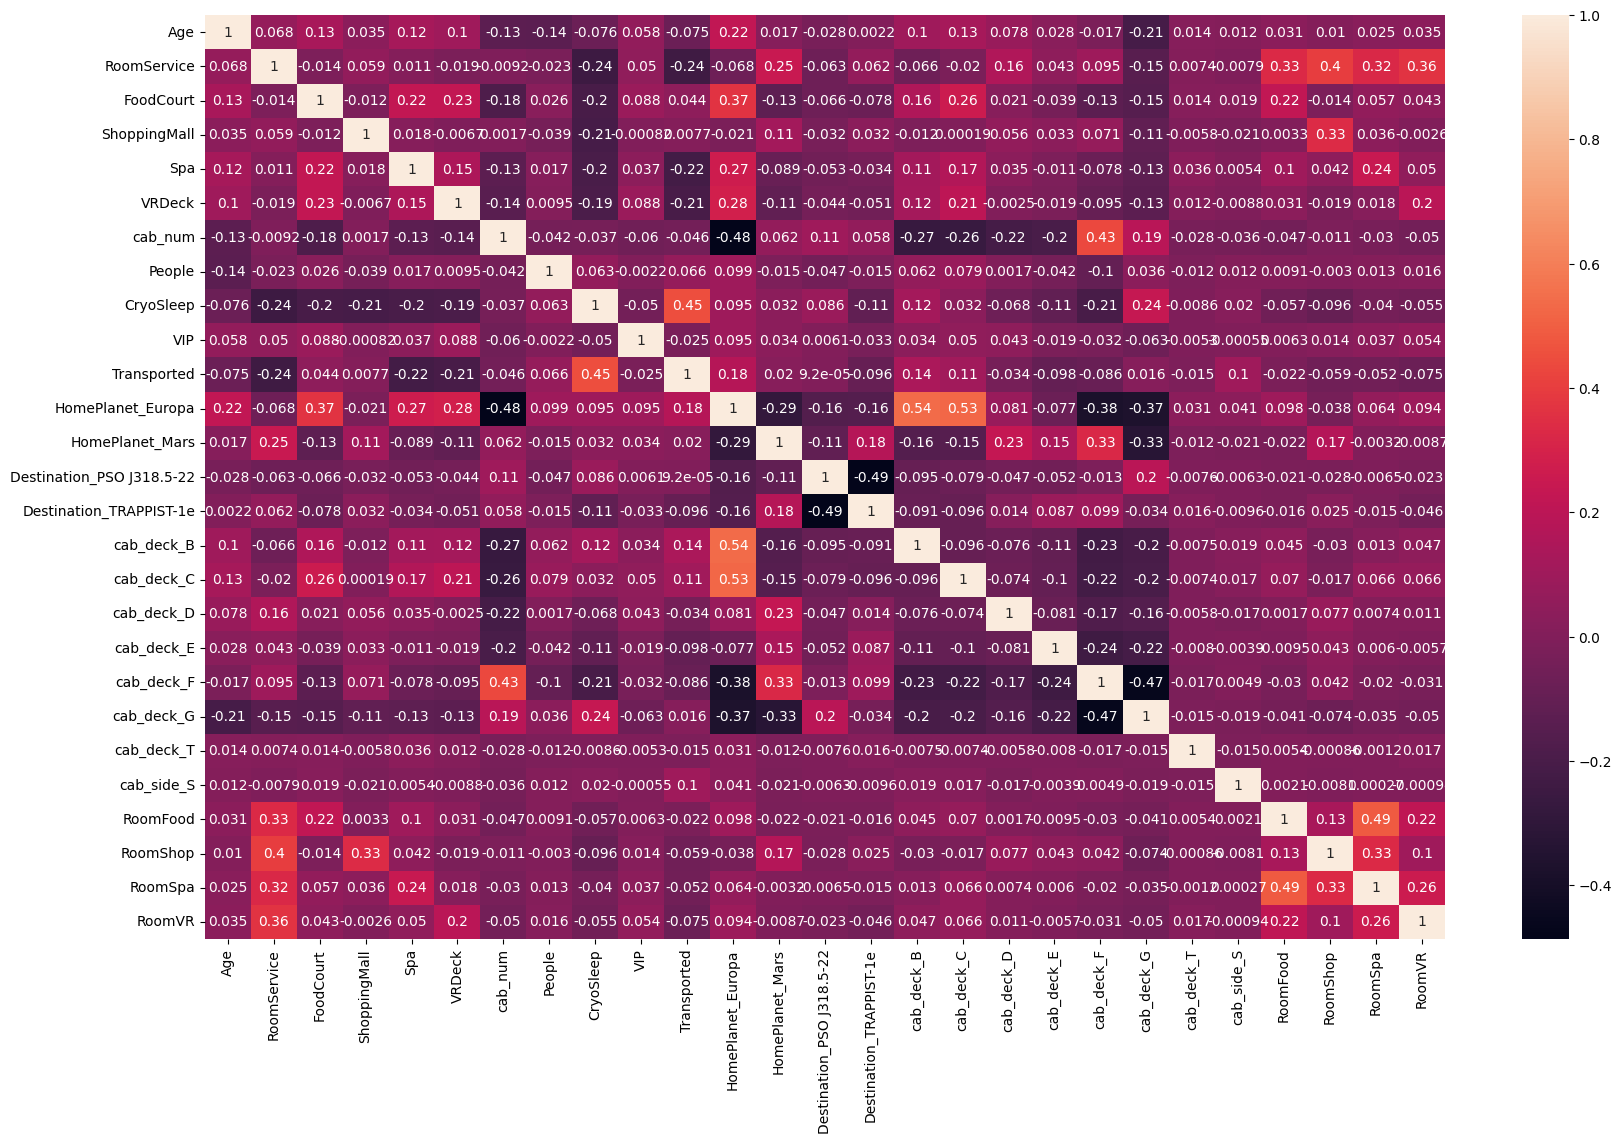

In [47]:
plt.figure(figsize = (20, 12))
cor = new_training1.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

X = new_training1.drop('Transported', axis = 1)
Y = new_training1['Transported']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [50]:
from sklearn.feature_selection import mutual_info_classif

Mutual = mutual_info_classif(X_train, Y_train)
Mutual

array([0.008034  , 0.06997912, 0.05520324, 0.0497259 , 0.06986335,
       0.06532557, 0.0138732 , 0.01366344, 0.10768177, 0.00587107,
       0.01515033, 0.        , 0.00012449, 0.00334872, 0.00174107,
       0.00218401, 0.        , 0.01229224, 0.00605749, 0.        ,
       0.004866  , 0.0086532 , 0.02133384, 0.03037412, 0.03516347,
       0.04606385])

In [51]:
S = pd.Series(Mutual)
S.index = X_train.columns
S.sort_values(ascending=False)

CryoSleep                    0.107682
RoomService                  0.069979
Spa                          0.069863
VRDeck                       0.065326
FoodCourt                    0.055203
ShoppingMall                 0.049726
RoomVR                       0.046064
RoomSpa                      0.035163
RoomShop                     0.030374
RoomFood                     0.021334
HomePlanet_Europa            0.015150
cab_num                      0.013873
People                       0.013663
cab_deck_E                   0.012292
cab_side_S                   0.008653
Age                          0.008034
cab_deck_F                   0.006057
VIP                          0.005871
cab_deck_T                   0.004866
Destination_TRAPPIST-1e      0.003349
cab_deck_C                   0.002184
cab_deck_B                   0.001741
Destination_PSO J318.5-22    0.000124
cab_deck_D                   0.000000
cab_deck_G                   0.000000
HomePlanet_Mars              0.000000
dtype: float

<Axes: >

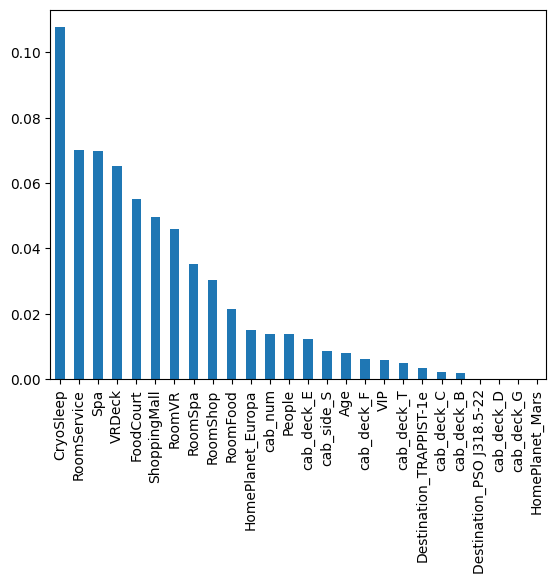

In [52]:
S.sort_values(ascending=False).plot.bar()

In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

/opt/anaconda3/envs/proj/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
print("Logistic Regression Model accuracy:")
print(f"{lr.score(X_test, Y_test) * 100:0.4f}%")

Logistic Regression Model accuracy:
78.7234%


In [55]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [56]:
print("Testing Data Accuracy:")
print(f"{forest.score(X_test, Y_test) * 100: 0.4f}%")

Testing Data Accuracy:
 79.8160%


In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [58]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [59]:
forest.fit(X_train_scaled, Y_train)

RandomForestClassifier(n_estimators=500)

In [60]:
print("Testing Data Accuracy:")
print(f"{forest.score(X_test_scaled, Y_test) * 100: 0.4f}%")

Testing Data Accuracy:
 79.9310%
